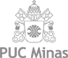
<B>PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS

NÚCLEO DE EDUCAÇÃO A DISTÂNCIA

Pós-graduação Lato Sensu em Ciência de Dados e Big Data

Título: Segmentação de Vendedores do marketplace Olist Store em 2017

Aluno: Alexandre Luís Nunes Cardiga</B>


<B>Nome:</B> 03_01_Modelos_K_Means.ipynb

<B>Data:</B> 18/03/2022
    
<B>Objetivo:</B>
    
<B>Bibliotecas:</B>  sys,pandas, numpy,matplotlib,BeautifulSoup,bs4,urllib,minhas_funcoes
<a class="anchor" id="etapas"></a>

## Indice

1. [Redução Dimensões](#reduzdimi)<br>
&emsp;1.1 [PCA](#pca)<br>
&emsp;1.2 [t-SNE](#tsne)<br>
&emsp;1.3 [UMAP](#uma)<br>
2. [Sem Redução](#semr)<br>
3. [Análise do dataframe df_score](#analise)<br>


<p><b>Localização Projeto: </b> <a href = 'https://github.com/Alexandre-316/Projeto_Ciencia_de_Dados' target = "_blank">Git Hub</a></p>

In [2]:
# Apaga todas as variáveis
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
%whos

Interactive namespace is empty.


In [4]:
import sys
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt


import seaborn as sns
#import datetime

from datetime import datetime

from scipy import stats
from scipy.stats    import normaltest, kstest
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score, davies_bouldin_score, calinski_harabasz_score

import warnings 
if not sys.warnoptions:
    #warnings.filterwarnings('ignore')
    warnings.simplefilter('ignore')

# Define a pasta onde está o arquivo minhas_funcoes.py
sys.path.insert(0, '../Lib')

# Importar minhas_funcoes.py
import minhas_funcoes as mf

import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

caminho = '../Data/'
caminho_temp = '../Template/'

#exibe todas as colunas
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 150)
#pd.set_option('display.max_columns', 999999999)
#pd.set_option('display.max_rows', 999999999)
pd.set_option('display.max_rows', 150)

## <a class="anchor" id="reduzdimi">1. Reduções de Dimensões</a>
[Retorna ao Indice](#etapas)

In [5]:
df_minmax_PCA_9_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_PCA_9_features.xlsx',index_col=0)
df_robust_PCA_9_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_PCA_9_features.xlsx',index_col=0)
df_power_PCA_15_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_PCA_15_features.xlsx',index_col=0)


In [6]:
#df_abt = pd.read_excel(caminho_temp+'01_Coleta_Processamento_df_Analytic_Base_Table.xlsx')
df_minmax_TSNE_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_TSNE_2_features.xlsx',index_col=0)
df_robust_TSNE_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_TSNE_2_features.xlsx',index_col=0)
df_power_TSNE_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_TSNE_2_features.xlsx',index_col=0)

In [7]:
df_minmax_SemReducao_17_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_SemReducao_17_features.xlsx',index_col=0)
df_robust_SemReducao_17_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_SemReducao_17_features.xlsx',index_col=0)
df_power_SemReducao_17_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_SemReducao_17_features.xlsx',index_col=0)

In [8]:
df_minmax_UMAP_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_UMAP_2_features.xlsx',index_col=0)
df_robust_UMAP_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_UMAP_2_features.xlsx',index_col=0)
df_power_UMAP_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_UMAP_2_features.xlsx',index_col=0)

In [9]:
df_abt = pd.read_excel(caminho_temp+'01_Coleta_Processamento_df_Analytic_Base_Table.xlsx')
#sem correlação
df_abt_sc=pd.read_excel(caminho_temp+'02_Coleta_Processamento_df_abt_sem_correlacao.xlsx')

In [10]:
df_abt_= df_abt_sc.select_dtypes(include=["int64", "float64"])
df_score= pd.DataFrame(columns= ['Algor.','Transf.', 'Red.Dim.','Features','ClustersCalc',\
                                'Clusters', 'inertia','silhouette', 'davies', 'calinski'])


In [11]:
df_abt.shape,df_abt_.shape

((1658, 114), (1658, 17))

## <a class="anchor" id="pca">1.1. PCA</a>

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,ClustersCalc,Clusters,inertia,silhouette,davies,calinski
0,K-Means,MinMaxScaler,PCA,9,6,2,269.813817,0.296377,1.346014,680.223023
1,K-Means,MinMaxScaler,PCA,9,6,3,237.001195,0.252123,1.444031,501.532555
2,K-Means,MinMaxScaler,PCA,9,6,4,210.581439,0.266675,1.405134,445.247002
3,K-Means,MinMaxScaler,PCA,9,6,5,190.966397,0.218328,1.392853,410.459474
4,K-Means,MinMaxScaler,PCA,9,6,6,174.812753,0.230607,1.357109,389.024262
5,K-Means,MinMaxScaler,PCA,9,6,7,163.185035,0.235709,1.349198,366.683484
6,K-Means,MinMaxScaler,PCA,9,6,8,151.893306,0.242273,1.290241,354.983610
7,K-Means,MinMaxScaler,PCA,9,6,9,144.158134,0.247950,1.229604,338.139077
8,K-Means,MinMaxScaler,PCA,9,6,10,137.484451,0.249477,1.277616,323.855396
9,K-Means,MinMaxScaler,PCA,9,6,11,132.372049,0.241382,1.319499,308.904109


Wall time: 2.86 s


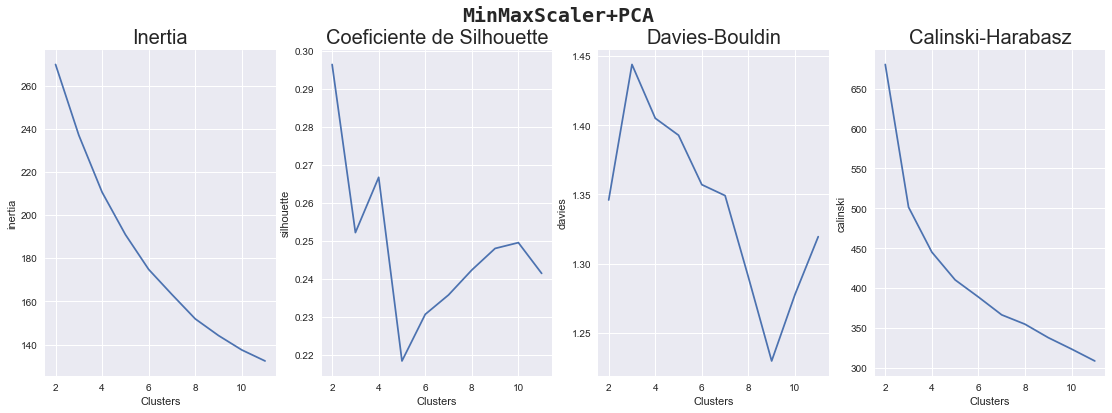

In [12]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte(df_score,df_minmax_PCA_9_features, 12,10,300,(19,6),'MinMaxScaler+PCA','K-Means','MinMaxScaler','PCA')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,ClustersCalc,Clusters,inertia,silhouette,davies,calinski
0,K-Means,RobustScaler,PCA,9,7,2,210240.257547,0.827573,0.953549,744.927538
1,K-Means,RobustScaler,PCA,9,7,3,180665.957720,0.711898,1.177046,568.631337
2,K-Means,RobustScaler,PCA,9,7,4,152797.414026,0.680070,0.957448,548.515115
3,K-Means,RobustScaler,PCA,9,7,5,135387.570705,0.639898,1.076521,517.147783
4,K-Means,RobustScaler,PCA,9,7,6,116665.266702,0.721773,0.847405,532.842991
5,K-Means,RobustScaler,PCA,9,7,7,102218.563033,0.640930,0.889890,545.375024
6,K-Means,RobustScaler,PCA,9,7,8,89302.761481,0.638022,0.798481,568.840488
7,K-Means,RobustScaler,PCA,9,7,9,81591.373462,0.466798,0.827211,563.928723
8,K-Means,RobustScaler,PCA,9,7,10,76226.443371,0.469971,0.909733,549.112353
9,K-Means,RobustScaler,PCA,9,7,11,72902.962153,0.473919,0.923981,523.925380


Wall time: 2.7 s


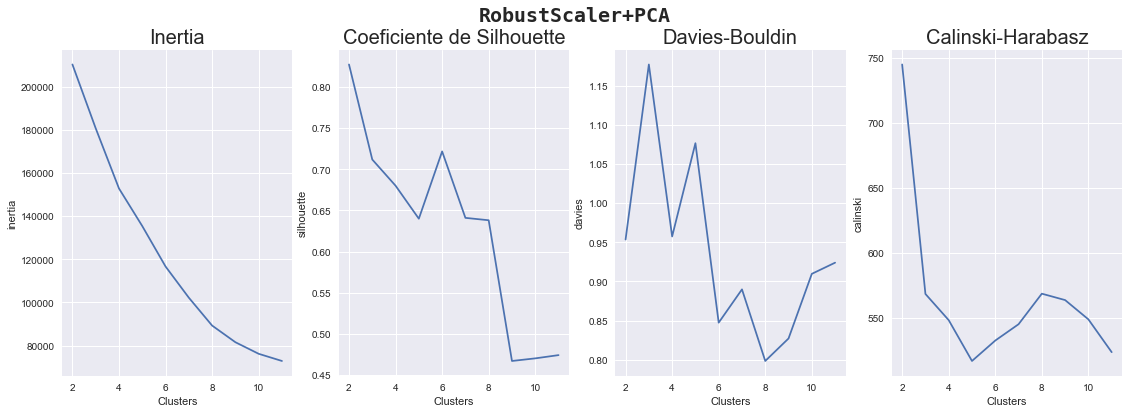

In [13]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte(df_score,df_robust_PCA_9_features, 12,10,300,(19,6),'RobustScaler+PCA','K-Means','RobustScaler','PCA')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,ClustersCalc,Clusters,inertia,silhouette,davies,calinski
0,K-Means,PowerTransformer,PCA,15,5,2,23395.909892,0.170646,1.985857,252.278966
1,K-Means,PowerTransformer,PCA,15,5,3,21004.716551,0.194224,1.838296,234.617704
2,K-Means,PowerTransformer,PCA,15,5,4,19497.039990,0.118388,2.237699,211.038845
3,K-Means,PowerTransformer,PCA,15,5,5,18608.617128,0.114858,2.174149,185.465129
4,K-Means,PowerTransformer,PCA,15,5,6,17736.756054,0.110318,2.105887,171.812267
5,K-Means,PowerTransformer,PCA,15,5,7,16940.053865,0.113648,2.046324,162.761125
6,K-Means,PowerTransformer,PCA,15,5,8,16327.928967,0.113062,2.017485,153.488798
7,K-Means,PowerTransformer,PCA,15,5,9,15617.893244,0.120753,1.957417,149.694455
8,K-Means,PowerTransformer,PCA,15,5,10,15134.845704,0.121308,1.902110,143.069522
9,K-Means,PowerTransformer,PCA,15,5,11,14641.483616,0.121898,1.887032,138.570372


Wall time: 3.45 s


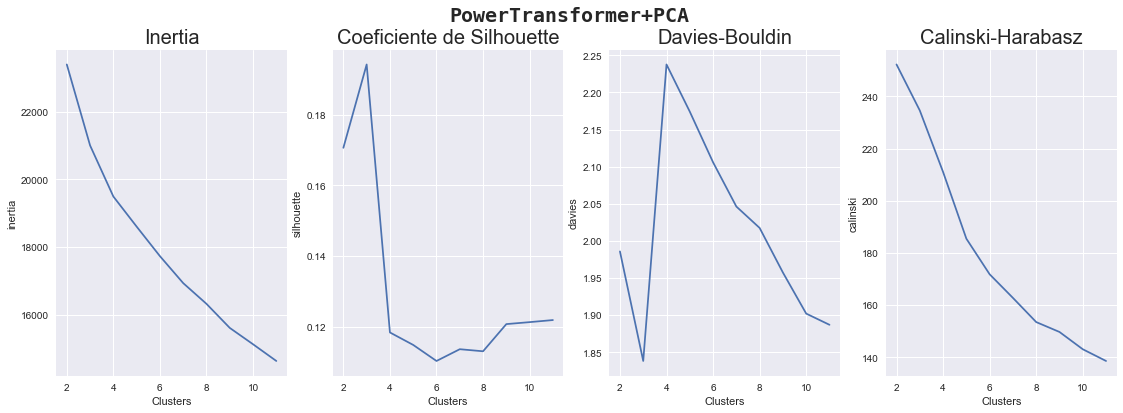

In [14]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte(df_score,df_power_PCA_15_features, 12,10,300,(19,6),'PowerTransformer+PCA','K-Means','PowerTransformer','PCA')


## <a class="anchor" id="tsne">1.2. t-SNE</a>

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,ClustersCalc,Clusters,inertia,silhouette,davies,calinski
0,K-Means,MinMaxScaler,t-SNE,2,5,2,528957.479121,0.457514,0.877175,1795.619891
1,K-Means,MinMaxScaler,t-SNE,2,5,3,331974.656374,0.455058,0.788337,1920.688166
2,K-Means,MinMaxScaler,t-SNE,2,5,4,218958.419803,0.477079,0.759788,2224.772337
3,K-Means,MinMaxScaler,t-SNE,2,5,5,171219.215807,0.458221,0.770239,2247.755663
4,K-Means,MinMaxScaler,t-SNE,2,5,6,138435.340571,0.454763,0.756687,2301.172332
5,K-Means,MinMaxScaler,t-SNE,2,5,7,117576.581568,0.452313,0.720744,2305.146684
6,K-Means,MinMaxScaler,t-SNE,2,5,8,103241.092856,0.431016,0.754396,2281.524688
7,K-Means,MinMaxScaler,t-SNE,2,5,9,87623.701079,0.429544,0.786342,2387.412121
8,K-Means,MinMaxScaler,t-SNE,2,5,10,74702.411672,0.430039,0.788340,2519.374984
9,K-Means,MinMaxScaler,t-SNE,2,5,11,67745.056518,0.428162,0.808188,2515.698601


Wall time: 2.67 s


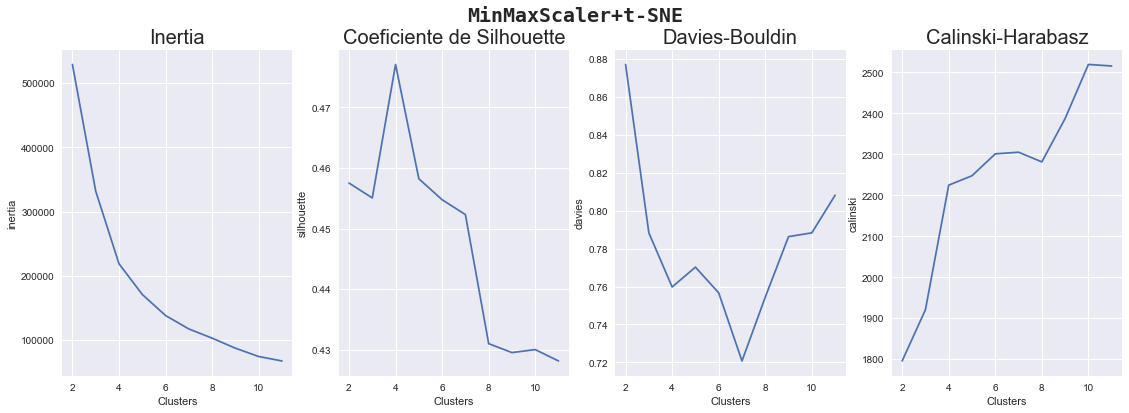

In [15]:
%%time
mf.df_score,df_score_local=mf.plot_inertia_sillhoutte(df_score,df_minmax_TSNE_2_features, 12,10,300,(19,6),'MinMaxScaler+t-SNE','K-Means','MinMaxScaler','t-SNE')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,ClustersCalc,Clusters,inertia,silhouette,davies,calinski
0,K-Means,RobustScaler,t-SNE,2,5,2,541712.364157,0.398415,0.986554,1423.037645
1,K-Means,RobustScaler,t-SNE,2,5,3,344410.117506,0.407021,0.850182,1592.507559
2,K-Means,RobustScaler,t-SNE,2,5,4,263020.017164,0.389572,0.893458,1559.961394
3,K-Means,RobustScaler,t-SNE,2,5,5,196179.714692,0.415486,0.758657,1708.441215
4,K-Means,RobustScaler,t-SNE,2,5,6,157800.263606,0.406576,0.829086,1778.544322
5,K-Means,RobustScaler,t-SNE,2,5,7,125889.975432,0.428033,0.741018,1926.428639
6,K-Means,RobustScaler,t-SNE,2,5,8,105684.137549,0.429333,0.746844,2010.777519
7,K-Means,RobustScaler,t-SNE,2,5,9,93920.703436,0.436772,0.741808,2004.386336
8,K-Means,RobustScaler,t-SNE,2,5,10,82751.954265,0.440843,0.710688,2045.631177
9,K-Means,RobustScaler,t-SNE,2,5,11,73267.815334,0.432417,0.734140,2099.490023


Wall time: 2.86 s


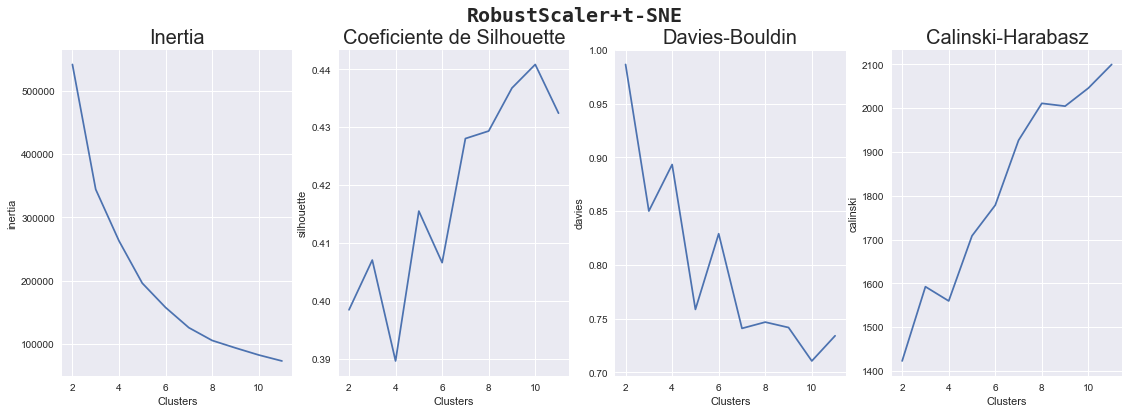

In [16]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte(df_score,df_robust_TSNE_2_features, 12,10,300,(19,6),'RobustScaler+t-SNE','K-Means','RobustScaler','t-SNE')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,ClustersCalc,Clusters,inertia,silhouette,davies,calinski
0,K-Means,PowerTransformer,t-SNE,2,5,2,681458.263124,0.478365,0.757090,2376.449393
1,K-Means,PowerTransformer,t-SNE,2,5,3,413907.078728,0.425431,0.792345,2490.044179
2,K-Means,PowerTransformer,t-SNE,2,5,4,313614.856779,0.391465,0.833912,2365.861781
3,K-Means,PowerTransformer,t-SNE,2,5,5,238620.323365,0.425247,0.772578,2460.528476
4,K-Means,PowerTransformer,t-SNE,2,5,6,181173.045792,0.442759,0.771006,2695.836846
5,K-Means,PowerTransformer,t-SNE,2,5,7,144771.455957,0.442715,0.738893,2878.857093
6,K-Means,PowerTransformer,t-SNE,2,5,8,120388.886808,0.448658,0.753483,3013.268129
7,K-Means,PowerTransformer,t-SNE,2,5,9,105005.589405,0.437828,0.768919,3051.362829
8,K-Means,PowerTransformer,t-SNE,2,5,10,93799.288315,0.437800,0.761418,3056.323616
9,K-Means,PowerTransformer,t-SNE,2,5,11,84593.036732,0.440916,0.756397,3066.075932


Wall time: 2.76 s


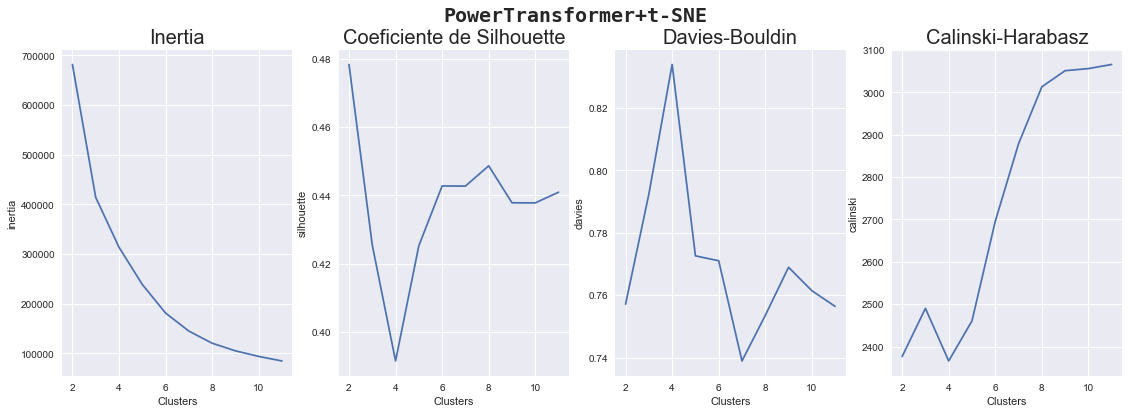

In [17]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte(df_score,df_power_TSNE_2_features, 12,10,300,(19,6),'PowerTransformer+t-SNE','K-Means','PowerTransformer','t-SNE')


## <a class="anchor" id="uma">1.3. UMAP</a>

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,ClustersCalc,Clusters,inertia,silhouette,davies,calinski
0,K-Means,MinMaxScaler,UMAP,2,4,2,8747.669222,0.466557,0.816035,2024.596221
1,K-Means,MinMaxScaler,UMAP,2,4,3,5230.775952,0.467903,0.844944,2248.273633
2,K-Means,MinMaxScaler,UMAP,2,4,4,3273.310617,0.516711,0.685737,2723.409704
3,K-Means,MinMaxScaler,UMAP,2,4,5,2519.393741,0.504913,0.666824,2775.912413
4,K-Means,MinMaxScaler,UMAP,2,4,6,2102.217991,0.471472,0.764861,2725.344589
5,K-Means,MinMaxScaler,UMAP,2,4,7,1753.445310,0.456282,0.813010,2775.962700
6,K-Means,MinMaxScaler,UMAP,2,4,8,1454.988827,0.476032,0.730780,2914.365516
7,K-Means,MinMaxScaler,UMAP,2,4,9,1221.629894,0.470862,0.729825,3074.383844
8,K-Means,MinMaxScaler,UMAP,2,4,10,1046.209184,0.464443,0.730993,3219.766785
9,K-Means,MinMaxScaler,UMAP,2,4,11,946.607394,0.469033,0.729654,3218.081155


Wall time: 2.65 s


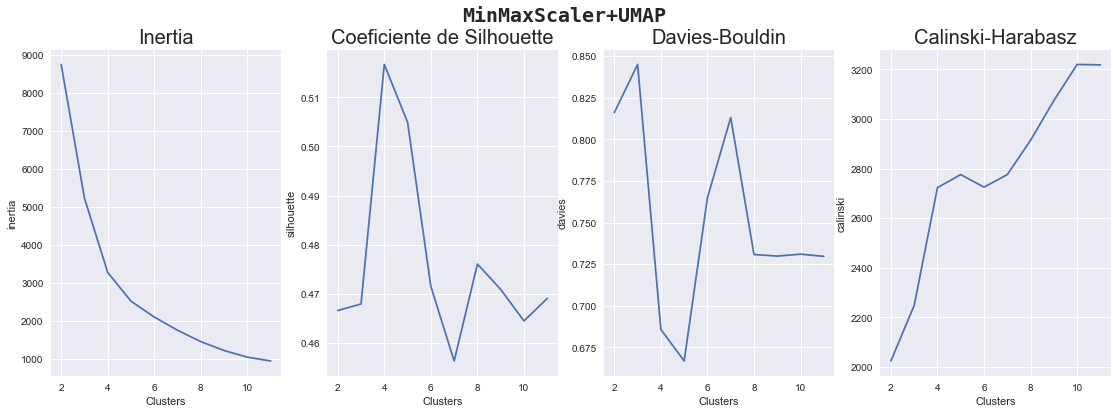

In [18]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte(df_score,df_minmax_UMAP_2_features, 12,10,300,(19,6),'MinMaxScaler+UMAP','K-Means','MinMaxScaler','UMAP')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,ClustersCalc,Clusters,inertia,silhouette,davies,calinski
0,K-Means,RobustScaler,UMAP,2,5,2,7440.204998,0.396387,0.961723,1287.715010
1,K-Means,RobustScaler,UMAP,2,5,3,4452.181603,0.443747,0.775665,1630.685163
2,K-Means,RobustScaler,UMAP,2,5,4,3360.206054,0.427257,0.791817,1618.742707
3,K-Means,RobustScaler,UMAP,2,5,5,2578.118090,0.418849,0.794874,1706.729442
4,K-Means,RobustScaler,UMAP,2,5,6,2041.748746,0.430113,0.756060,1809.814010
5,K-Means,RobustScaler,UMAP,2,5,7,1665.679711,0.432627,0.768569,1909.694213
6,K-Means,RobustScaler,UMAP,2,5,8,1374.629435,0.444345,0.703043,2032.178462
7,K-Means,RobustScaler,UMAP,2,5,9,1175.841414,0.459536,0.702214,2112.344450
8,K-Means,RobustScaler,UMAP,2,5,10,1039.844484,0.446571,0.701529,2146.120465
9,K-Means,RobustScaler,UMAP,2,5,11,917.053655,0.453194,0.691192,2210.627391


Wall time: 2.92 s


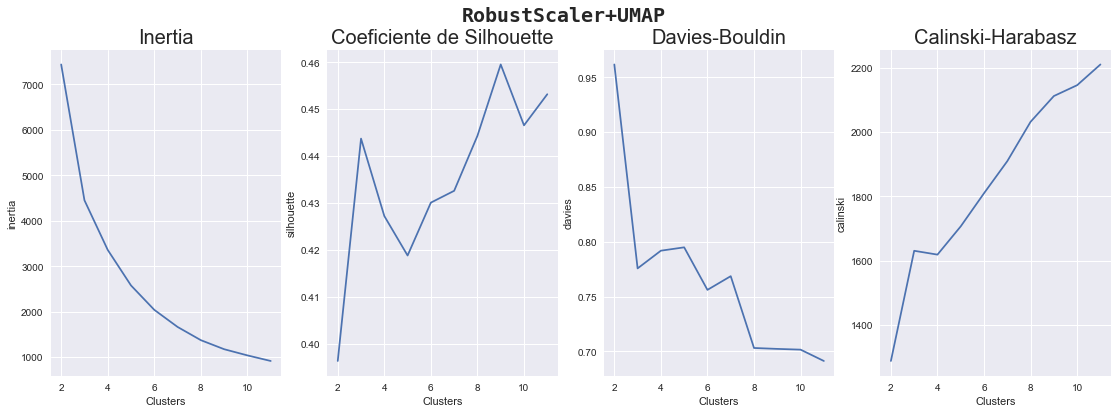

In [19]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte(df_score,df_robust_UMAP_2_features, 12,10,300,(19,6),'RobustScaler+UMAP','K-Means','RobustScaler','UMAP')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,ClustersCalc,Clusters,inertia,silhouette,davies,calinski
0,K-Means,PowerTransformer,UMAP,2,5,2,11146.567965,0.602669,0.709457,1974.593140
1,K-Means,PowerTransformer,UMAP,2,5,3,6270.254297,0.510676,0.704868,2397.592960
2,K-Means,PowerTransformer,UMAP,2,5,4,3958.478786,0.550894,0.617009,2852.323645
3,K-Means,PowerTransformer,UMAP,2,5,5,2822.181827,0.499712,0.691658,3165.176719
4,K-Means,PowerTransformer,UMAP,2,5,6,2197.316432,0.510173,0.723405,3344.377441
5,K-Means,PowerTransformer,UMAP,2,5,7,1741.875189,0.526109,0.587180,3585.526903
6,K-Means,PowerTransformer,UMAP,2,5,8,1337.963025,0.522396,0.554267,4069.582303
7,K-Means,PowerTransformer,UMAP,2,5,9,1137.328345,0.516819,0.602365,4222.965996
8,K-Means,PowerTransformer,UMAP,2,5,10,958.177206,0.502575,0.646886,4487.129226
9,K-Means,PowerTransformer,UMAP,2,5,11,854.142272,0.502022,0.643504,4547.523548


Wall time: 2.48 s


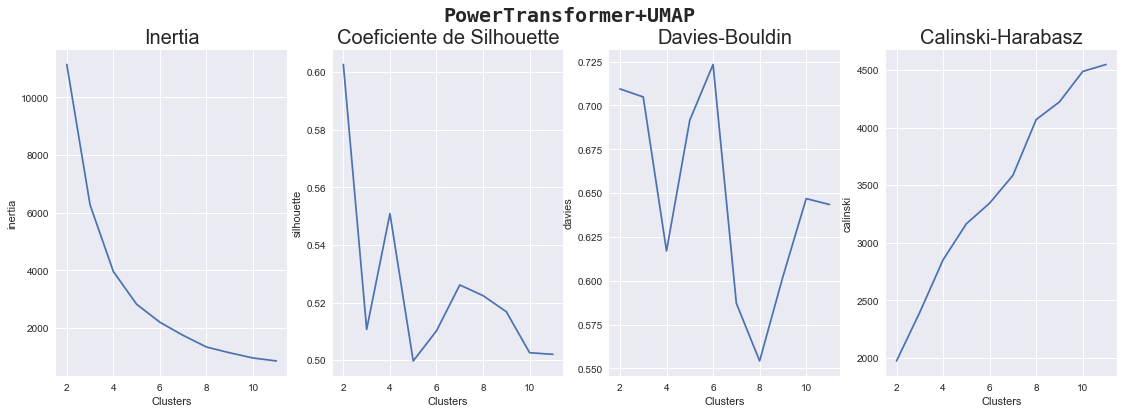

In [20]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte(df_score,df_power_UMAP_2_features, 12,10,300,(19,6),'PowerTransformer+UMAP','K-Means','PowerTransformer','UMAP')


## <a class="anchor" id="semr">2. Sem Redução</a>
[Retorna ao Indice](#etapas)

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,ClustersCalc,Clusters,inertia,silhouette,davies,calinski
0,K-Means,MinMaxScaler,SemRedução,17,6,2,286.581926,0.287285,1.386812,640.430554
1,K-Means,MinMaxScaler,SemRedução,17,6,3,253.762444,0.239954,1.480857,468.432657
2,K-Means,MinMaxScaler,SemRedução,17,6,4,227.336689,0.253889,1.437561,412.465729
3,K-Means,MinMaxScaler,SemRedução,17,6,5,207.615969,0.206946,1.434663,377.781699
4,K-Means,MinMaxScaler,SemRedução,17,6,6,191.513802,0.216763,1.414796,355.217259
5,K-Means,MinMaxScaler,SemRedução,17,6,7,179.814103,0.222175,1.356954,332.987731
6,K-Means,MinMaxScaler,SemRedução,17,6,8,168.205096,0.227183,1.342141,321.200227
7,K-Means,MinMaxScaler,SemRedução,17,6,9,160.848823,0.230106,1.292703,303.152585
8,K-Means,MinMaxScaler,SemRedução,17,6,10,155.363909,0.232353,1.345814,285.277512
9,K-Means,MinMaxScaler,SemRedução,17,6,11,148.841752,0.225473,1.354340,275.054819


Wall time: 2.92 s


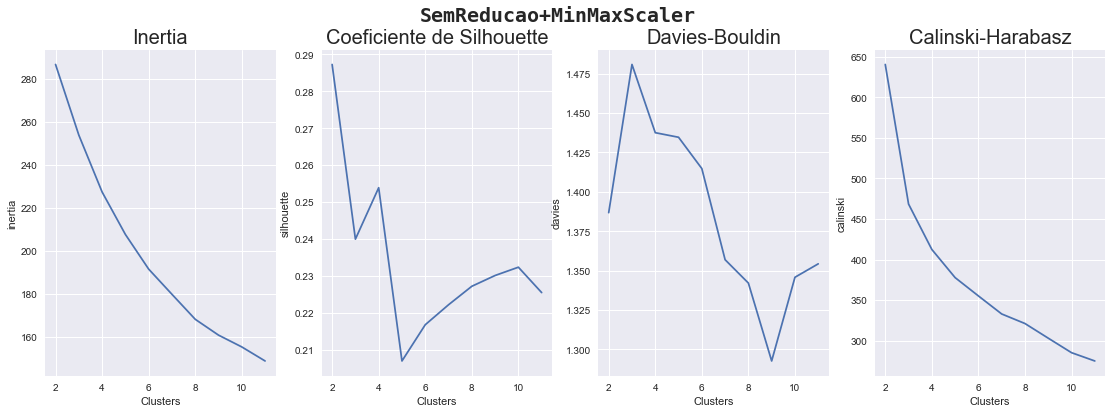

In [21]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte(df_score,df_minmax_SemReducao_17_features, 12,10,300,(19,6),'SemReducao+MinMaxScaler','K-Means','MinMaxScaler','SemRedução')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,ClustersCalc,Clusters,inertia,silhouette,davies,calinski
0,K-Means,RobustScaler,SemRedução,17,7,2,225390.848080,0.810170,0.984352,694.899728
1,K-Means,RobustScaler,SemRedução,17,7,3,195614.385214,0.639520,1.223763,526.059229
2,K-Means,RobustScaler,SemRedução,17,7,4,167843.606867,0.662211,0.998964,499.707279
3,K-Means,RobustScaler,SemRedução,17,7,5,148471.211539,0.716779,0.705913,477.345837
4,K-Means,RobustScaler,SemRedução,17,7,6,131487.489975,0.689185,0.879399,473.617783
5,K-Means,RobustScaler,SemRedução,17,7,7,116977.929151,0.594003,0.930818,477.498721
6,K-Means,RobustScaler,SemRedução,17,7,8,104266.699590,0.589112,0.846204,487.638783
7,K-Means,RobustScaler,SemRedução,17,7,9,95977.202047,0.401723,0.890684,481.058360
8,K-Means,RobustScaler,SemRedução,17,7,10,91156.019045,0.403022,0.989687,459.634912
9,K-Means,RobustScaler,SemRedução,17,7,11,87805.551900,0.400745,1.024667,435.480213


Wall time: 2.76 s


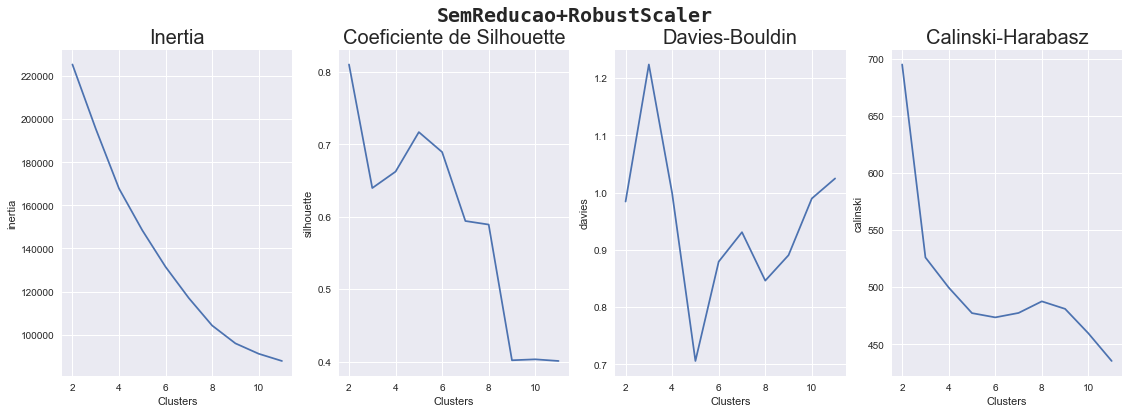

In [22]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte(df_score,df_robust_SemReducao_17_features, 12,10,300,(19,6),'SemReducao+RobustScaler','K-Means','RobustScaler','SemRedução')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,ClustersCalc,Clusters,inertia,silhouette,davies,calinski
0,K-Means,PowerTransformer,SemRedução,17,5,2,24621.709631,0.164412,2.048754,239.726036
1,K-Means,PowerTransformer,SemRedução,17,5,3,22230.489143,0.186860,1.892856,221.685866
2,K-Means,PowerTransformer,SemRedução,17,5,4,20720.735901,0.112444,2.313595,198.634303
3,K-Means,PowerTransformer,SemRedução,17,5,5,19820.478114,0.109906,2.236520,174.418190
4,K-Means,PowerTransformer,SemRedução,17,5,6,19074.630718,0.093993,2.275528,157.822002
5,K-Means,PowerTransformer,SemRedução,17,5,7,18152.121507,0.109370,2.132281,152.102822
6,K-Means,PowerTransformer,SemRedução,17,5,8,17432.244043,0.108549,2.087731,145.409501
7,K-Means,PowerTransformer,SemRedução,17,5,9,16998.231932,0.106528,2.077760,135.665798
8,K-Means,PowerTransformer,SemRedução,17,5,10,16327.908416,0.114924,1.967030,132.983862
9,K-Means,PowerTransformer,SemRedução,17,5,11,15816.473729,0.118168,1.925143,128.806269


Wall time: 3.28 s


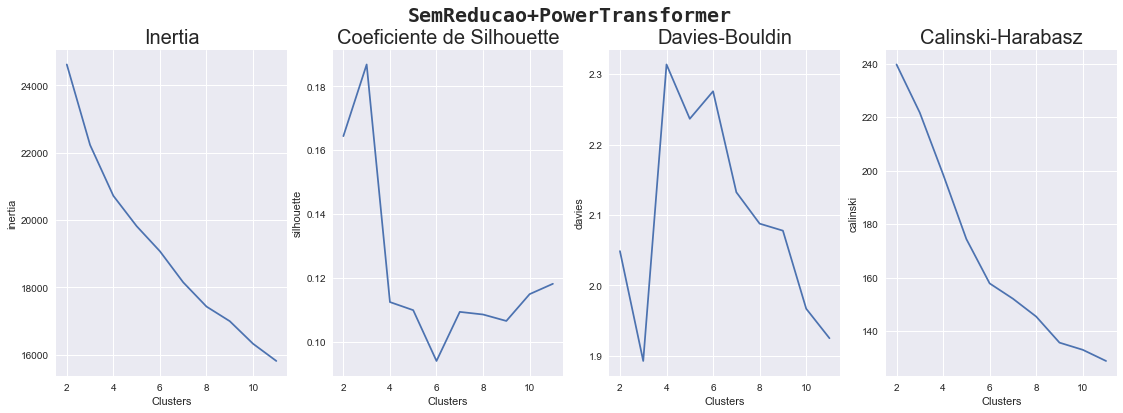

In [23]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte(df_score,df_power_SemReducao_17_features, 12,10,300,(19,6),'SemReducao+PowerTransformer','K-Means','PowerTransformer','SemRedução')


## <a class="anchor" id="analise">3. Análise do dataframe df_score</a>
[Retorna ao Indice](#etapas)

In [25]:
df_score[df_score['silhouette']>0.50].sort_values(by='silhouette', ascending=True)

,Algor.,Transf.,Red.Dim.,Features,ClustersCalc,Clusters,inertia,silhouette,davies,calinski
9,K-Means,PowerTransformer,UMAP,2,5,11,854.142272,0.502022,0.643504,4547.523548
8,K-Means,PowerTransformer,UMAP,2,5,10,958.177206,0.502575,0.646886,4487.129226
3,K-Means,MinMaxScaler,UMAP,2,4,5,2519.393741,0.504913,0.666824,2775.912413
4,K-Means,PowerTransformer,UMAP,2,5,6,2197.316432,0.510173,0.723405,3344.377441
1,K-Means,PowerTransformer,UMAP,2,5,3,6270.254297,0.510676,0.704868,2397.592960
2,K-Means,MinMaxScaler,UMAP,2,4,4,3273.310617,0.516711,0.685737,2723.409704
7,K-Means,PowerTransformer,UMAP,2,5,9,1137.328345,0.516819,0.602365,4222.965996
6,K-Means,PowerTransformer,UMAP,2,5,8,1337.963025,0.522396,0.554267,4069.582303
5,K-Means,PowerTransformer,UMAP,2,5,7,1741.875189,0.526109,0.587180,3585.526903
2,K-Means,PowerTransformer,UMAP,2,5,4,3958.478786,0.550894,0.617009,2852.323645


In [26]:
#Escolhido p/ K-Means:UMAP c/ PowerTransformer com 8 clusters 
#inertia=1322.840631   1337.963025
#silhoutte=0.534755     0.522396
#davies=0.543320        0.554267
#calinski=4540.193466   4069.582303
#                       hj 10/04/22

In [27]:
#clust = cluster.KMeans(n_clusters=n_clusters, random_state = 42)
kmean = KMeans(n_clusters=8, n_init=10, max_iter=300)
kmean.fit(df_power_UMAP_2_features)

KMeans()

In [28]:
df_clusters = pd.DataFrame(kmean.labels_)
df_temp= df_power_UMAP_2_features.merge(df_clusters, left_index=True, right_index=True)
df_temp.rename({0: 'cluster'}, axis=1, inplace=True)

In [29]:
#Atach clusters ao dataset
df_clusters = pd.DataFrame(kmean.labels_)
df_abt= df_abt.merge(df_clusters, left_index=True, right_index=True)
df_abt.rename({0: 'cluster'}, axis=1, inplace=True)

#teste opção 2
#df_abt['cluster'] = kmean.labels_
#df_abt['cluster'] = df_abt['cluster'].astype(str)

In [30]:
df_abt_sc= df_abt_sc.merge(df_clusters, left_index=True, right_index=True)
df_abt_sc.rename({0: 'cluster'}, axis=1, inplace=True)


In [31]:
round(df_abt['cluster'].value_counts(normalize=True)*100,2)

0    22.07
6    20.69
4    14.84
2    12.67
7    11.16
1    10.92
5     3.92
3     3.74
Name: cluster, dtype: float64

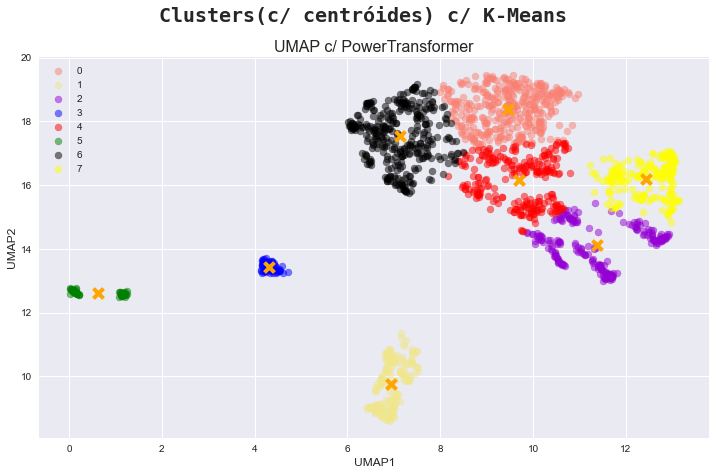

In [32]:
centros = kmean.cluster_centers_

plt.style.use('seaborn')
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('UMAP1', fontsize=12)
ax.set_ylabel('UMAP2', fontsize=12)
ax.set_title('UMAP c/ PowerTransformer', fontsize= 16)
 
targets = [0, 1, 2, 3, 4, 5, 6, 7]
colors = ['salmon', 'khaki', 'darkviolet','blue','red','green','black','yellow']
for target, color in zip(targets, colors):
    indicesToKeep = df_temp['cluster'] == target
    ax.scatter(df_temp.loc[indicesToKeep, 'TUMAP1'],
               df_temp.loc[indicesToKeep, 'TUMAP2'], c=color, s=50, alpha=0.5)
ax.scatter(centros[:, 0], centros[:, 1], marker = 'x', linewidths = 4, c='orange', s=100)

plt.suptitle('Clusters(c/ centróides) c/ K-Means', fontsize = 20, fontname = 'monospace', weight = 'bold')    
ax.legend(targets)
#ax.grid()

In [33]:
df_score.to_excel(caminho_temp+'03_01_Modelos_K_Means_df_score.xlsx', index=True)

In [34]:
df_abt.to_excel(caminho_temp+'03_01_Modelos_K_Means_df_abt_kmeans_cluster.xlsx', index=True)

In [35]:
df_abt_sc.to_excel(caminho_temp+'03_01_Modelos_K_Means_df_abt_sc_kmeans.xlsx', index=True)